# News Headlines Sentiment
### We will use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. Use descriptive statistics to answer the following questions:
#### 1) Which coin had the highest mean positive score?
#### **Bitcoin had the higher mean positive score with 0.0649 vs Ethereum's score of 0.0643**
#### 2) Which coin had the highest negative score?
#### **Bitcoin had the highest negative score with 0.215 vs Ethereum's 0.196**
#### 3) Which coin had the highest positive score?
#### **Ethereum had the highest positive score with 0.318 vs Bitcoin's 0.174**

In [13]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

In [14]:
# Read your api key environment variable
load_dotenv()

# Create a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [15]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

# Show sample article
bitcoin_news["articles"][0]

Total articles about Bitcoin: 4626


{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Timothy B. Lee, Ars Technica',
 'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
 'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
 'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
 'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
 'publishedAt': '2020-11-12T14:00:00Z',
 'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"}

In [16]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

# Show sample article
ethereum_news["articles"][0]

Total articles about Ethereum: 1251


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Karissa Bell',
 'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
 'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
 'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
 'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
 'publishedAt': '2020-11-12T21:05:41Z',
 'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptoc

In [61]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,compound,positive,negative,neutral,text
0,2020-11-12,-0.6705,0.064,0.199,0.737,A former Microsoft software engineer from Ukra...
1,2020-12-03,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...
2,2020-11-12,0.2144,0.053,0.000,0.947,PayPal is bringing its newly-announced support...
3,2020-11-05,0.2263,0.049,0.000,0.951,"Two days ago, about $1 billion worth of bitcoi..."
4,2020-11-20,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,..."


In [58]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "compound", "positive", "negative", "neutral", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,compound,positive,negative,neutral,text
0,2020-11-12,0.2144,0.053,0.0,0.947,PayPal is bringing its newly-announced support...
1,2020-11-23,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
2,2020-11-23,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...
3,2020-11-23,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...
4,2020-11-19,0.8779,0.318,0.0,0.682,"PayPal has launched the Generosity Network, a ..."


In [59]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.108116,0.064895,0.034053,0.901000
std,0.395648,0.061939,0.067692,0.093549
min,-0.670500,0.000000,0.000000,0.716000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.202300,0.053000,0.000000,0.941000
75%,0.325950,0.093000,0.031000,0.975500
max,0.765000,0.174000,0.215000,1.000000


In [60]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.153245,0.06430,0.021050,0.914650
std,0.339247,0.07896,0.054473,0.104806
min,-0.493900,0.00000,0.000000,0.672000
25%,0.000000,0.00000,0.000000,0.876000
50%,0.000000,0.06150,0.000000,0.932000
75%,0.430825,0.09525,0.000000,1.000000
max,0.877900,0.31800,0.196000,1.000000


## Questions:
### Q: Which coin had the highest mean positive score?
#### A: **Bitcoin had the higher mean positive score with 0.065 vs Ethereum's score of 0.064**
### Q: Which coin had the highest compound score?
#### A: **Ethereum had the highest compound score with 0.877 vs Bitcoin's 0.765**
### Q. Which coin had the highest positive score?
#### A:**Ethereum had the highest positive score with 0.318 vs Bitcoin's 0.174**

## Tokenizer
### In this section, we will use NLTK and Python to tokenize the text for each coin. We will make sure to:
#### 1) Lowercase each word
#### 2) Remove Punctuation
#### 3) Remove Stopwords

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [25]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [26]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

In [64]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

In [65]:
# Create a new tokens column for bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2020-11-12,-0.6705,0.064,0.199,0.737,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,2020-12-03,0.6369,0.162,0.000,0.838,Visa has partnered with cryptocurrency startup...,"[visahas, partnered, cryptocurrency, startup, ..."
2,2020-11-12,0.2144,0.053,0.000,0.947,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
3,2020-11-05,0.2263,0.049,0.000,0.951,"Two days ago, about $1 billion worth of bitcoi...","[two, day, ago, billion, worth, bitcoin, sat, ..."
4,2020-11-20,0.2023,0.050,0.000,0.950,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."


In [67]:
# Create a new tokens column for ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,date,compound,positive,negative,neutral,text,tokens
0,2020-11-12,0.2144,0.053,0.0,0.947,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,2020-11-23,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
2,2020-11-23,0.0000,0.000,0.0,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,2020-11-23,0.4215,0.088,0.0,0.912,LONDON (Reuters) - Digital currencies Ethereum...,"[london, reuters, digital, currency, ethereum,..."
4,2020-11-19,0.8779,0.318,0.0,0.682,"PayPal has launched the Generosity Network, a ...","[paypal, ha, launched, generosity, network, pl..."


## NGrams and Frequency Analysis
### In this section we will look at the ngrams and word frequency for each coin. 
#### 1) Use NLTK to produce the n-grams for N = 2. 
#### 2) List the top 10 words for each coin.

In [101]:
from collections import Counter
from nltk import ngrams

In [105]:
# Generate the Bitcoin Tokens
btc_tokens = []
for tokens in bitcoin_df.tokens:
    btc_tokens += tokens
print(btc_tokens)

['former', 'microsoft', 'software', 'engineer', 'ukraine', 'ha', 'sentenced', 'nine', 'year', 'prison', 'stealing', 'million', 'store', 'credit', 'microsofts', 'online', 'store', 'volod', 'char', 'visahas', 'partnered', 'cryptocurrency', 'startup', 'blockfi', 'offer', 'first', 'reward', 'credit', 'card', 'pay', 'bitcoin', 'rather', 'cash', 'worth', 'applying', 'unless', 'youre', 'extremely', 'bullish', 'char', 'paypal', 'bringing', 'newlyannounced', 'support', 'cryptocurrency', 'us', 'account', 'first', 'announced', 'plan', 'open', 'cryptocurrency', 'trading', 'usbased', 'user', 'october', 'wa', 'char', 'two', 'day', 'ago', 'billion', 'worth', 'bitcoin', 'sat', 'dormant', 'since', 'seizure', 'silk', 'road', 'marketplace', 'one', 'biggest', 'underground', 'drug', 'website', 'dark', 'web', 'suddenly', 'cha', 'char', 'november', 'absolutely', 'massive', 'twomonth', 'rally', 'bitcoin', 'passed', 'first', 'time', 'next', 'day', 'soared', 'even', 'higher', 'reaching', 'price', 'roug', 'char'

In [107]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_count = Counter(ngrams(btc_tokens, n=2))
print(dict(btc_bigram_count))

{('former', 'microsoft'): 2, ('microsoft', 'software'): 2, ('software', 'engineer'): 2, ('engineer', 'ukraine'): 2, ('ukraine', 'ha'): 2, ('ha', 'sentenced'): 2, ('sentenced', 'nine'): 2, ('nine', 'year'): 2, ('year', 'prison'): 2, ('prison', 'stealing'): 2, ('stealing', 'million'): 2, ('million', 'store'): 2, ('store', 'credit'): 2, ('credit', 'microsofts'): 2, ('microsofts', 'online'): 2, ('online', 'store'): 1, ('store', 'volod'): 1, ('volod', 'char'): 1, ('char', 'visahas'): 1, ('visahas', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'char'):

In [106]:
# Generate the Ethereum Tokens
eth_tokens = []
for tokens in ethereum_df.tokens:
    eth_tokens += tokens
print(eth_tokens)

['paypal', 'bringing', 'newlyannounced', 'support', 'cryptocurrency', 'us', 'account', 'first', 'announced', 'plan', 'open', 'cryptocurrency', 'trading', 'usbased', 'user', 'october', 'wa', 'char', 'file', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'reutersdado', 'ruvicillustrationlondon', 'reuters', 'char', 'file', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'standing', 'pc', 'motherboard', 'seen', 'illustration', 'picture', 'february', 'reutersdado', 'ruvicillustrationlondon', 'reuters', 'char', 'london', 'reuters', 'digital', 'currency', 'ethereum', 'xrp', 'soared', 'monday', 'gaining', 'momentum', 'bitcoin', 'powered', 'towards', 'alltime', 'highfile', 'photo', 'representation', 'ethereum', 'virtual', 'currency', 'char', 'paypal', 'ha', 'launched', 'generosity', 'network', 'platform', 'allows', 'user', 'create', 'customized', 'personal', 'fundraising', 'campaign', 'y

In [108]:
# Generate the Ethereum N-grams where N=2
eth_bigram_count = Counter(ngrams(eth_tokens, n=2))
print(dict(eth_bigram_count))

{('paypal', 'bringing'): 1, ('bringing', 'newlyannounced'): 1, ('newlyannounced', 'support'): 1, ('support', 'cryptocurrency'): 1, ('cryptocurrency', 'us'): 1, ('us', 'account'): 1, ('account', 'first'): 1, ('first', 'announced'): 1, ('announced', 'plan'): 1, ('plan', 'open'): 1, ('open', 'cryptocurrency'): 1, ('cryptocurrency', 'trading'): 1, ('trading', 'usbased'): 1, ('usbased', 'user'): 1, ('user', 'october'): 1, ('october', 'wa'): 1, ('wa', 'char'): 1, ('char', 'file'): 2, ('file', 'photo'): 2, ('photo', 'representation'): 6, ('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3, ('virtual', 'currency'): 9, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'motherboard'): 2, ('motherboard', 'seen'): 2, ('seen', 'illustration'): 5, ('illustration', 'picture'): 2, ('picture', 'february'): 2, ('february', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationlondon'): 3, ('ruvicillustrationlondon', 'reuters'): 3, ('reuters', 'char'): 3, ('char', 'london'): 1, ('london

In [110]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    
    return Counter(tokens).most_common(N)

In [111]:
# Get the top 10 words for Bitcoin
bitcoin_top10 = token_count(btc_tokens, 10)
bitcoin_top10

[('char', 19),
 ('bitcoin', 11),
 ('ha', 6),
 ('cryptocurrency', 5),
 ('us', 4),
 ('november', 4),
 ('week', 4),
 ('currency', 4),
 ('taken', 4),
 ('reuters', 4)]

In [113]:
# Get the top 10 words for Ethereum
eth_top10 = token_count(eth_tokens, 10)
eth_top10

[('char', 20),
 ('bitcoin', 14),
 ('reuters', 13),
 ('currency', 10),
 ('photo', 9),
 ('virtual', 9),
 ('representation', 8),
 ('illustration', 8),
 ('reutersdado', 8),
 ('seen', 7)]

## Word Clouds
### In this section, we will generate word clouds for each coin to summarize the news for each coin

In [114]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')
import matplotlib 
#mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [122]:
def process_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

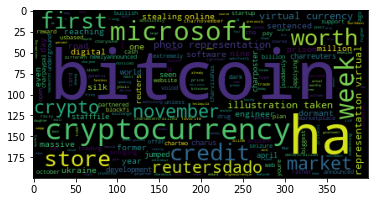

In [135]:
# Generate the Bitcoin word cloud

btc_words = ''
for token in bitcoin_df.tokens:
    btc_words += str(token)
btc_string = " ".join(str(token) for token in tokenizer(btc_words))
btc_cloud = WordCloud().generate(btc_string)
plt.imshow(btc_cloud)

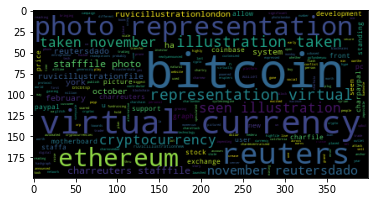

In [136]:
# Generate the Ethereum word cloud

eth_words = ''
for token in ethereum_df.tokens:
    eth_words += str(token)
eth_string = " ".join(str(token) for token in tokenizer(eth_words))
eth_cloud = WordCloud().generate(eth_string)
plt.imshow(eth_cloud)

## Named Entity Recognition
### In this section, we will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [137]:
import spacy
from spacy import displacy

In [138]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [139]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm') 

## Bitcoin NER

In [141]:
# Concatenate all of the bitcoin text together
btc_string

'former microsoft software engineer ukraine ha sentenced nine year prison stealing million store credit microsofts online store volod charvisahas partnered cryptocurrency startup blockfi offer first reward credit card pay bitcoin rather cash worth applying unless youre extremely bullish charpaypal bringing newlyannounced support cryptocurrency u account first announced plan open cryptocurrency trading usbased user october wa chartwo day ago billion worth bitcoin sat dormant since seizure silk road marketplace one biggest underground drug website dark web suddenly cha charnovember absolutely massive twomonth rally bitcoin passed first time next day soared even higher reaching price roug charyouve watching crypto market past week youll noticed something special bitcoin everyones favorite decentralized digital currency based hype lie general mal chardecentralized exchange protocol allow crypto trader investor trade across different blockhains development significant new development come l

In [143]:
# Run the NER processor on all of the text
bitcoin_ner = nlp(btc_string)

# Add a title to the document
bitcoin_ner.user_data['Title'] = 'Bitcoin NER'

former microsoft software engineer ukraine ha sentenced nine year prison stealing million store credit microsofts online store volod charvisahas partnered cryptocurrency startup blockfi offer first reward credit card pay bitcoin rather cash worth applying unless youre extremely bullish charpaypal bringing newlyannounced support cryptocurrency u account first announced plan open cryptocurrency trading usbased user october wa chartwo day ago billion worth bitcoin sat dormant since seizure silk road marketplace one biggest underground drug website dark web suddenly cha charnovember absolutely massive twomonth rally bitcoin passed first time next day soared even higher reaching price roug charyouve watching crypto market past week youll noticed something special bitcoin everyones favorite decentralized digital currency based hype lie general mal chardecentralized exchange protocol allow crypto trader investor trade across different blockhains development significant new development come la

In [144]:
# Render the visualization
displacy.render(bitcoin_ner, style = 'ent')

In [145]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

microsoft ORG
ukraine GPE
nine year DATE
million CARDINAL
charvisahas ORG
cryptocurrency PRODUCT
first ORDINAL
bitcoin GPE
october DATE
bitcoin GPE
one CARDINAL
first ORDINAL
next day DATE
past week DATE
bitcoin GPE
hype lie ORG
crypto ORG
april CARDINAL
november DATE
today DATE
november DATE
monthly DATE
april fourthbest month DATE
williams PERSON
arya stark PERSON
lady catelyn lord PERSON
eddard acolyte PERSON
monday DATE
twitt charbillion transaction flowed dormant bitcoin ORG
ross ulbricht PERSON
world week EVENT
microsoft ORG
ukraine GPE
nine year DATE
million CARDINAL
tuesday evening TIME
december DATE
prior week bitcoin ORG
chavez charjustin PERSON
bbc newsimage PERSON
bitcoin GPE
headline week DATE
november DATE
reutersdado ruvicillustrationtokyo ORG
reuters bitcoin ORG
reutersdado ruvicillustrationlondon reuters PERSON


##  Ethereum NER

In [142]:
# Concatenate all of the ethereum text together
eth_string

'paypal bringing newlyannounced support cryptocurrency u account first announced plan open cryptocurrency trading usbased user october wa charfile photo representation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustrationlondon reuters charfile photo representation ethereum virtual currency standing pc motherboard seen illustration picture february reutersdado ruvicillustrationlondon reuters charlondon reuters digital currency ethereum xrp soared monday gaining momentum bitcoin powered towards alltime highfile photo representation ethereum virtual currency charpaypal ha launched generosity network platform allows user create customized personal fundraising campaign yes like gofundmeyou raise maximum charreuters stafffile photo representation virtual currency bitcoin seen front stock graph illustration taken november reutersdado ruvicillustrationfile photo charreuters stafffile photo representation virtual currency bitcoin see

In [148]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_string)

# Add a title to the document
eth_ner.user_data['Title'] = 'Ethereum NER'

In [149]:
# Render the visualization
displacy.render(eth_ner, style = 'ent')

In [150]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

first ORDINAL
october DATE
february DATE
reutersdado ruvicillustrationlondon ORG
february DATE
reutersdado ruvicillustrationlondon ORG
reuters ORG
charlondon PRODUCT
reuters digital currency ORG
monday DATE
november DATE
november DATE
charnew york PERSON
un ORG
early february year DATE
one CARDINAL
last month DATE
october DATE
million CARDINAL
november DATE
reutersdado ruvicillustrationnew york ORG
n charreuters PERSON
bitcoin GPE
november DATE
reutersdado ruvicillustrationnew york ORG
november DATE
photolondon reuters bitcoin ORG
reutersdado ruvicillustrationlondon PERSON
charhala GPE
hedera ORG
syrian NORP
bitcoin GPE
bitcoin GPE
tech center FAC
sunnyvale GPE
california GPE
october DATE
reutersstephen lamullibitcoin PERSON
metamaskio wallet wallet FAC
